# Simulador de práctica del período del metrónomo (Labo 1)

## (O *Un intento de entender los errores instrumentales estadísticamente*)

La primera práctica de Laboratorio 1 se trata de medir 150 veces el período de un metrónomo (o un péndulo, o un farol titilante). Para eso se hacen mediciones directas del tiempo con un cronómetro (el del celular por ejemplo) que habitualmente tiene una mínima apreciación de 0,01 s. 
Una de las moralejas de la práctica es que, ya habiendo hecho las 150 mediciones, el resultado a reportar será el promedio con su error, que *es* la suma del error instrumental y el estadístico :

$$ T = (\bar{x} \pm (E_{instrumental} + E_{estadistico}) ) $$

A veces se explica que la suma debe hacerse "en cuadratura" y que, el intervalo que no sobreestima el error es:

$$ T = (\bar{x} \pm \sqrt{E_{instrumental}^2 + E_{estadistico}^2} \hspace{3pt} ) $$

Se considera que el error instrumental es la mínima división del instrumento y el error estadístico se calcula como: 

$$E_{estadistico} = \frac{S}{\sqrt{N}} \hspace{8pt};\hspace{8pt} S^2 = \frac{\sum(x_i - \bar{x})^2}{N-1} $$


Lo que se suele decir al respecto al T reportado es que ese intervalo contiene al valor real del período del metrónomo. Esta forma de entender el resultado implica, por ejemplo, que si al repetir el experimento se obtiene un intervalo que no tiene intersección con aquel, entonces alguno de los dos reultados es incorrecto.

Con esta simulación quiero hacer el intento de entender cómo interpretar ese intervalo y ver si es lo mejor reportar el resultado de esa manera.

Voy a suponer que
1. En la medición, el tiempo transcurrido desde que se inicia el crononómetro hasta que se lo detiene es una variable aleatoria con distribución gaussiana.
2. El error instrumental es sencillamente un error de "truncado". Esto es, que el cronómetro sencillamente hace un redondeo del valor real del tiempo transcurrido desde que se inicia el crononómetro hasta que se lo detiene, y la cantidad de cifras del redondeo dependerá de la apreciación del instrumento.

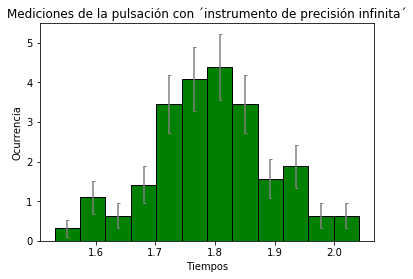

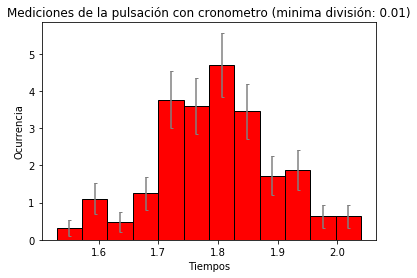

In [39]:
import numpy as np
import matplotlib.pyplot as plt

N = 150                                                   # <-- Número de mediciones      
T = 1.8                                                   # <-- Valor real del período (el que desconocemos en la vida real)  
sigma = 0.1                                               # <-- Sigma asociado al método de medición 
error_instrumental = 0.01                                 # <-- Minima división de nuestro cronómetro
cifras_significativas = len(str(error_instrumental))-2

mediciones = np.random.normal(T,sigma,N)  
mediciones_cronometro = np.round(mediciones,cifras_significativas) # <--Error de instrumental tipo truncado en todas las mediciones


#Veamos los histogramas para ver si obtenemos algo razonable

plt.figure(1)
plt.title('Mediciones de la pulsación con ´instrumento de precisión infinita´')
n, bins, patches = plt.hist(mediciones, bins=int(np.sqrt(N)), density=True, facecolor='green', edgecolor='black', alpha=1);
dx = bins[1] - bins[0]
plt.errorbar(bins[:-1]+0.5*dx, n, yerr=np.sqrt(n*dx*N)/(dx*N), fmt='none', color = 'grey', capsize = 1.5 );
plt.xlabel('Tiempos');
plt.ylabel('Ocurrencia');

plt.figure(2)
plt.title('Mediciones de la pulsación con cronometro (minima división: '+ str(error_instrumental) + ')')
n2, bins2, patches2 = plt.hist(mediciones_cronometro, bins=int(np.sqrt(N)), density=True, facecolor='red', edgecolor='black', alpha=1);
dx = bins[1] - bins[0]
plt.errorbar(bins2[:-1]+0.5*dx, n2, yerr=np.sqrt(n2*dx*N)/(dx*N), fmt='none', color = 'grey', capsize = 1.5 );
plt.xlabel('Tiempos');
plt.ylabel('Ocurrencia');


Ya teniendo los datos, queremos reportar un resultado para el período. El valor central del intervalo será el promedio; para los bordes consideremos las siguientes opciones: 

1. Ignorar completamente el error asociado a la mínima division del instrumento
2. Sumar en cuadratura el error instrumental y el estadístico
3. Hacer la suma ordinaria del error instrumental y el estadístico

In [25]:
media = np.mean(mediciones)
sigma_estadistico = np.std(mediciones)/np.sqrt(N)

media_cronometro = np.mean(mediciones_cronometro)
sigma_estadistico_cronometro = np.std(mediciones_cronometro)/np.sqrt(N)


print ("Cronómetro: 1) T = (" + str(np.round(media_cronometro,6)) + u" \u00B1 " + str(np.round(sigma_estadistico_cronometro,6)) + ")s    (sin sumar el error instrumental)")
print("            2) T = (" + str(np.round(media_cronometro,6)) + u" \u00B1 " + str(np.round(np.sqrt(sigma_estadistico_cronometro**2 + error_instrumental**2),6)) + ")s    (sumando en cuadratura el error instrumental)")
print("            3) T = (" + str(np.round(media_cronometro,6)) + u" \u00B1 " + str(np.round(sigma_estadistico_cronometro+error_instrumental,6)) + ")s    (sumando ordinariamente el error instrumental)")

print('')
print ("Con precisión ´infinita´ hubiéramos obtenido: T = (" + str(np.round(media,6)) + u" \u00B1 " + str(np.round(sigma_estadistico,6)) + ")s")


Cronómetro: 1) T = (1.797267 ± 0.008102)s    (sin sumar el error instrumental)
            2) T = (1.797267 ± 0.01287)s    (sumando en cuadratura el error instrumental)
            3) T = (1.797267 ± 0.018102)s    (sumando ordinariamente el error instrumental)

Con precisión ´infinita´ hubiéramos obtenido: T = (1.796731 ± 0.008111)s


Sería interesante ver la cobertura de los intervalos para entender mejor su significado. Para eso voy a repetir la simulación muchas veces y ver, con cada receta, en cuántas ocasiones el intervalo incluye al verdadero valor del período del metrónomo.

In [38]:
##Confidence level

simus = 10000
error_instrumental = 0.01       # <--Es interesante ver cómo cambia el resultado al modificar la apreciación del instrumento

mediciones = np.random.normal(T,sigma,size = (simus,N))  
mediciones_cronometro = np.round(mediciones,cifras_significativas)

promedios_crono = np.mean(mediciones_cronometro,axis = 1)
sigmas_estadisticos = np.std(mediciones_cronometro, axis = 1)/np.sqrt(N)
suma = sigmas_estadisticos + error_instrumental
suma_cuadratura = np.sqrt(sigmas_estadisticos**2+error_instrumental**2)

seleccion = np.logical_and(promedios_crono-sigmas_estadisticos<T,promedios_crono+sigmas_estadisticos>T)
seleccion2 = np.logical_and(promedios_crono-suma_cuadratura<T,promedios_crono+suma_cuadratura>T)
seleccion3 = np.logical_and(promedios_crono-suma<T,promedios_crono+suma>T)


cl1 = len(seleccion[seleccion == True])/simus
cl2 = len(seleccion[seleccion2 == True])/simus
cl3 = len(seleccion[seleccion3 == True])/simus

print('Cobertura del intervalo (promedio  \u00B1  error estadistico): ' + str(cl1))
print('Cobertura del intervalo (promedio  \u00B1  raiz(error estadistico^2 + error instrumental^2): ' + str(cl2))
print('Cobertura del intervalo (promedio  \u00B1  error estadistico + error instrumental): ' + str(cl3))



Cobertura del intervalo (promedio  ±  error estadistico): 0.6772
Cobertura del intervalo (promedio  ±  raiz(error estadistico^2 + error instrumental^2): 0.8831
Cobertura del intervalo (promedio  ±  error estadistico + error instrumental): 0.9738


### Algunas conclusiones preliminares:

1. El intervalo que solo considera el error estadístico tiene un C.L de 68%, como hubiéramos esperado. 
2. Las otras recetas para armar el intervalo tienen una **probabilidad mucho más alta de contener al verdadero valor del período**. En el caso de la suma ordinaria la probabilidad es casi 1 (siempre contenemos al verdadero T) y en la suma en cuadratura es un poquito más baja.

3. Esto cambia cualitativamente cuando modificamos la apreciación del instrumento. En particular, si decimos que la "mínima división" es muy chica tenemos casi 68% en los tres casos (lo cual es razonable por la definición misma de los intervalos)

4. Sería **muy importante** tener una predicción teórica de la cobertura en función de los parámetros del problema, para entender qué significa el resultado que estamos reportando a la humanidad.
